In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv('advertising.csv')

In [65]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [67]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 200
Number of columns: 4


In [68]:
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [69]:
data.duplicated().sum()

0

In [70]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

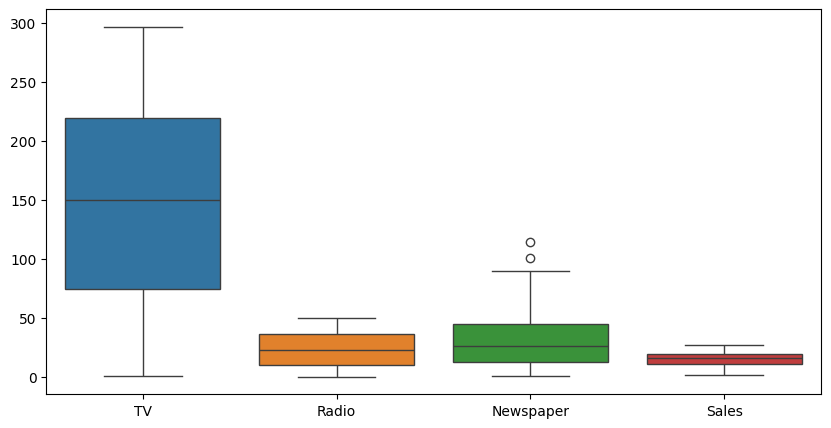

In [71]:
# Outlier Detection
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=data, ax=ax)

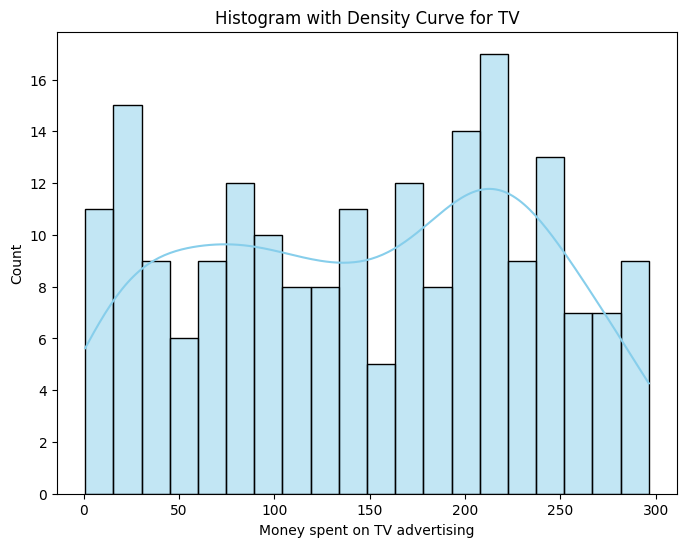

In [72]:
#Histogram with Density curve for TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(data['TV'], bins=20, color='skyblue', kde=True)
ax.set_xlabel('Money spent on TV advertising')
ax.set_title('Histogram with Density Curve for TV')
plt.show()

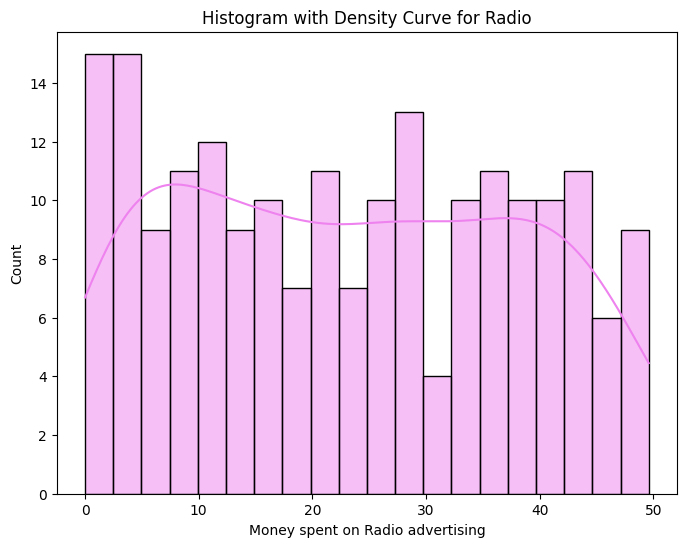

In [73]:
#Histogram with Density curve for Radio Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(data['Radio'],bins=20,color='violet', kde=True)
ax.set_xlabel('Money spent on Radio advertising')
ax.set_title('Histogram with Density Curve for Radio')
plt.show()

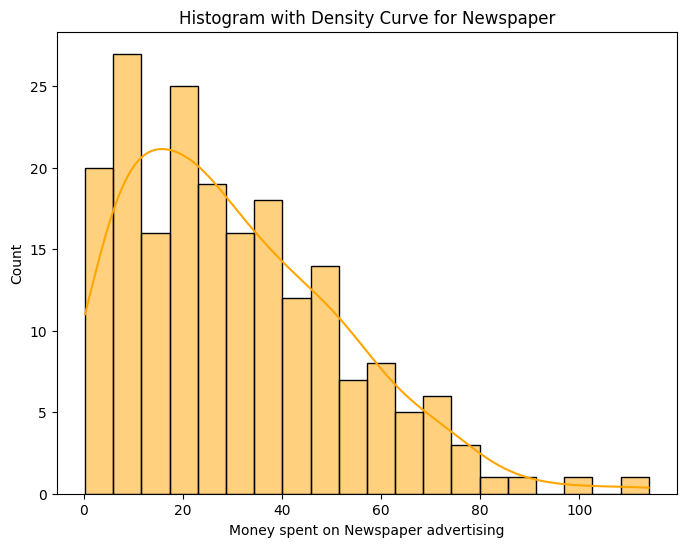

In [74]:
#Histogram with Density curve for Newspaper Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(data['Newspaper'],bins=20,color='orange', kde=True)
ax.set_xlabel('Money spent on Newspaper advertising')
ax.set_title('Histogram with Density Curve for Newspaper')
plt.show()

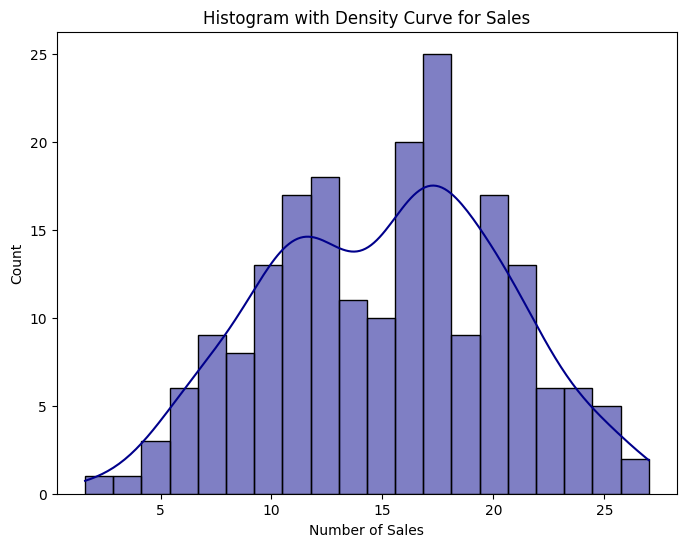

In [75]:
#Histogram with Density curve for Sales Advertising
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(data['Sales'],bins=20,color='darkblue', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

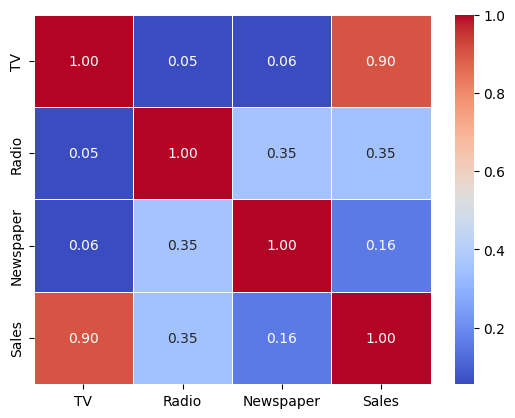

In [76]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(data.corr(), annot=True,cmap='coolwarm',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

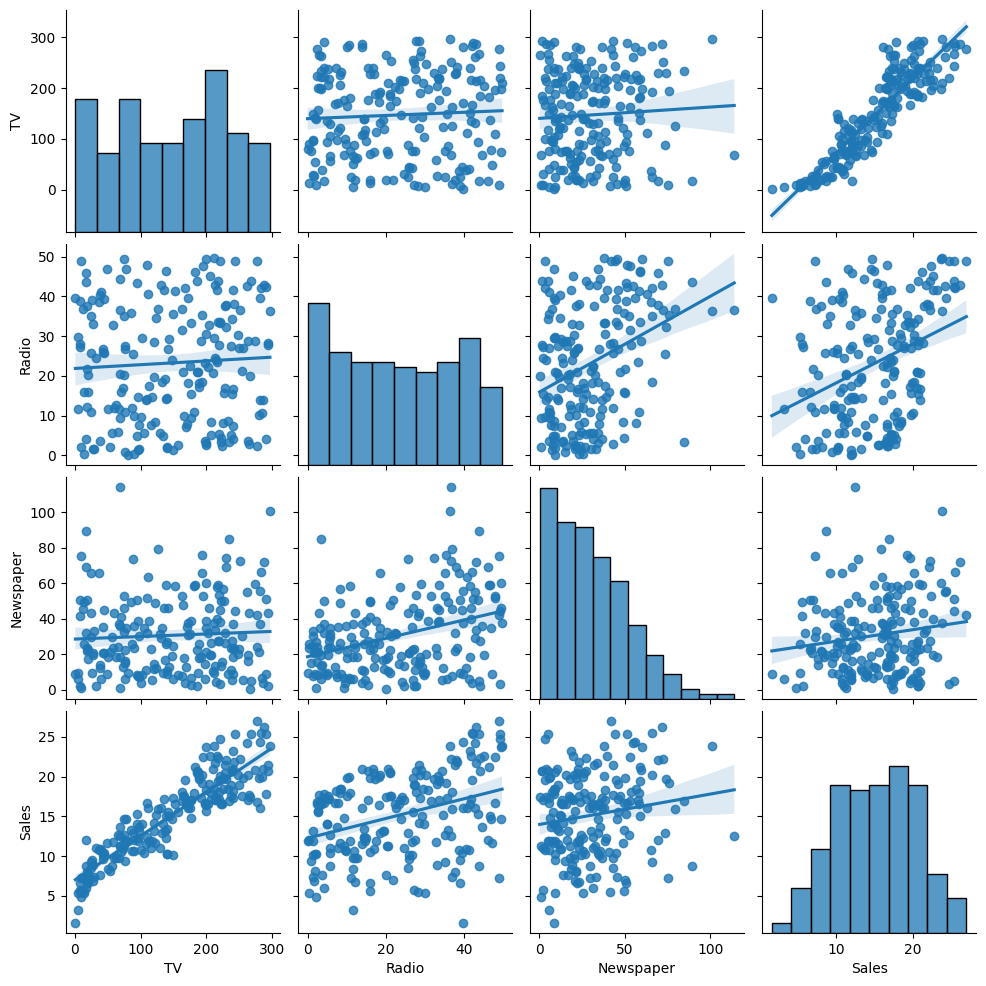

In [77]:
sns.pairplot(data, kind='reg')

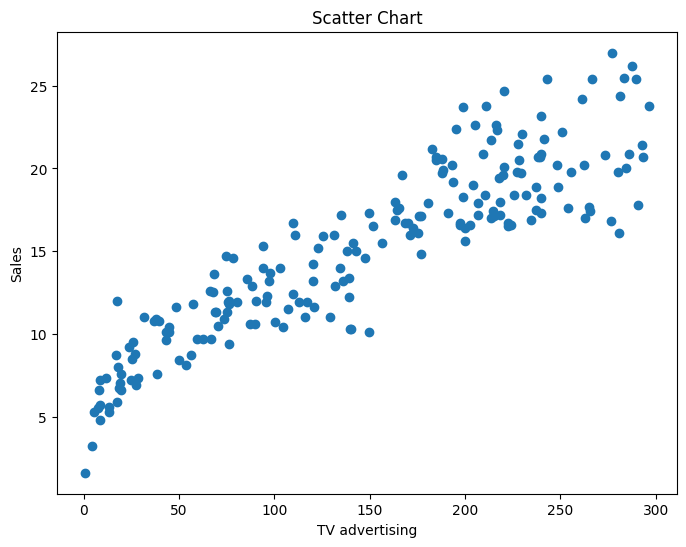

In [78]:
#Relationship of Sales against TV Advertising
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(x='TV',y='Sales',data=data,marker='o')
ax.set_xlabel('TV advertising')
ax.set_ylabel('Sales')
ax.set_title("Scatter Chart")
plt.show()

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for Sales against each features
data_vif = data.drop('Sales', axis=1)
data_vif = data_vif.apply(pd.to_numeric, errors= 'coerce')

vif_data= pd.DataFrame()
vif_data["Feature"] = data_vif.columns
vif_data["VIF"] =[variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]
print(vif_data)

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [80]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= data[['TV', 'Radio','Newspaper']]
y=data['Sales']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data

,TV,Radio,Newspaper,Sales
92,217.7,33.5,59.0,19.4
39,228.0,37.7,32.0,21.5
81,239.8,4.1,36.9,17.3
128,220.3,49.0,3.2,24.7
126,7.8,38.9,50.6,6.6
...,...,...,...,...
71,109.8,14.3,31.7,12.4
137,273.7,28.9,59.7,20.8
111,241.7,38.0,23.2,21.8
121,18.8,21.7,50.4,7.0


In [81]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']

#Build a Linear Regression model
fitted_model = LinearRegression()
#Train the model
fitted_model.fit(x_train,y_train)
#Make predictions
y_pred = fitted_model.predict(x_test)

In [82]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE =  mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.7909692342004346
Mean absolute error value is:  1.373270545556392
R2 score value is:  0.9035254813685487


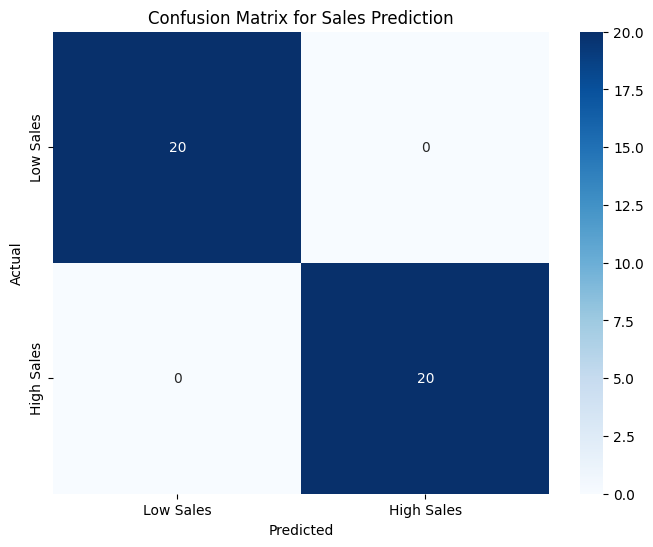

In [83]:
from sklearn.metrics import confusion_matrix

threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)  # 1 for high sales, 0 for low sales
y_test_class = np.where(y_test >= threshold, 1, 0)

# Now, you can create the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sales Prediction')
plt.show()

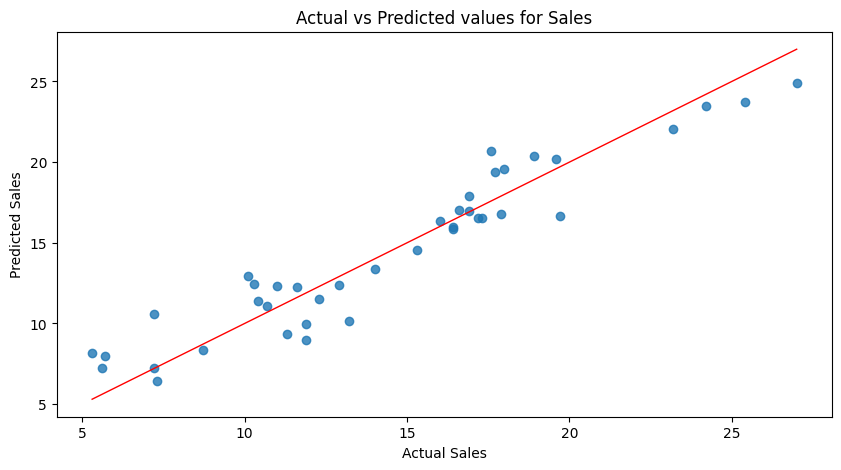

In [84]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred,alpha=0.8)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=1)
plt.title('Actual vs Predicted values for Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']

#Build a Linear Regression model
fitted_model = RandomForestRegressor()
#Train the model
fitted_model.fit(x_train,y_train)
#Make predictions
y_pred = fitted_model.predict(x_test)

MSE =  mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  1.4826886500000023
Mean absolute error value is:  0.8215000000000003
R2 score value is:  0.9487483874647419


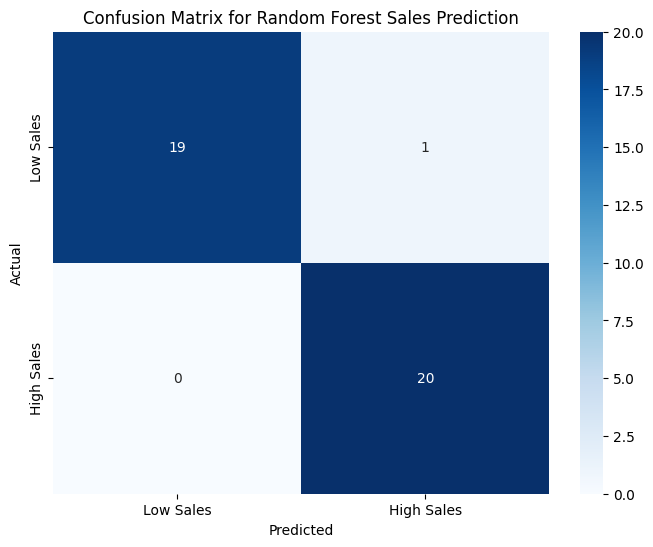

In [86]:
from sklearn.metrics import confusion_matrix

# Define a threshold (you might need to adjust this based on your data)
threshold = np.mean(y_test)

# Classify predictions and actual values based on the threshold
y_pred_class = np.where(y_pred >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)

# Create the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Sales Prediction')
plt.show()

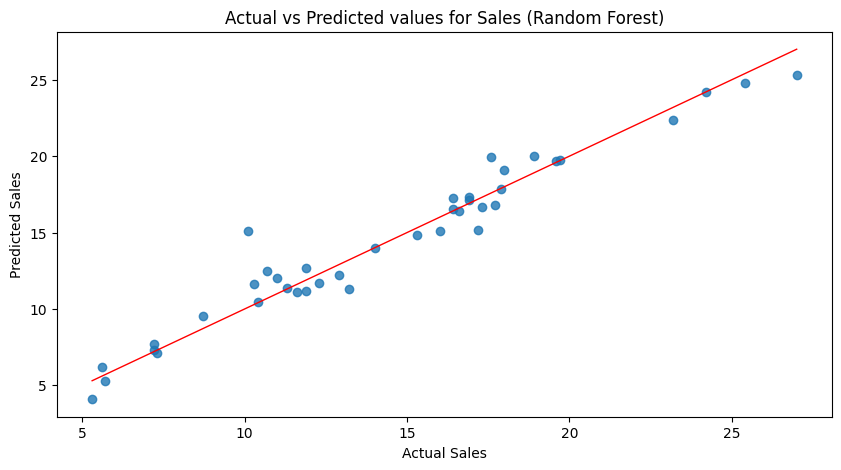

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.8)  # Alpha for transparency
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)  # Diagonal line
plt.title('Actual vs Predicted values for Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

Mean Squared Error: 3.178659999999999
Mean Absolute Error: 1.4069999999999996
R-squared: 0.8901243017532217


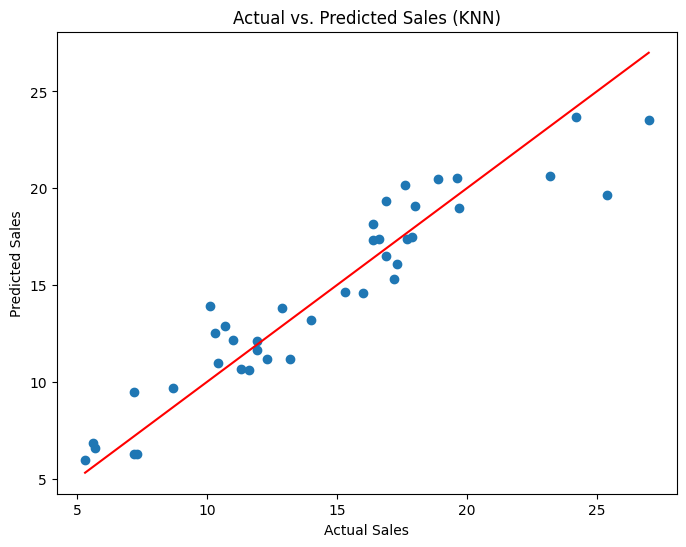

In [88]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Make predictions
y_pred = knn_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

#Optional: Visualize the results (e.g., a scatter plot of actual vs. predicted values)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (KNN)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line for reference
plt.show()

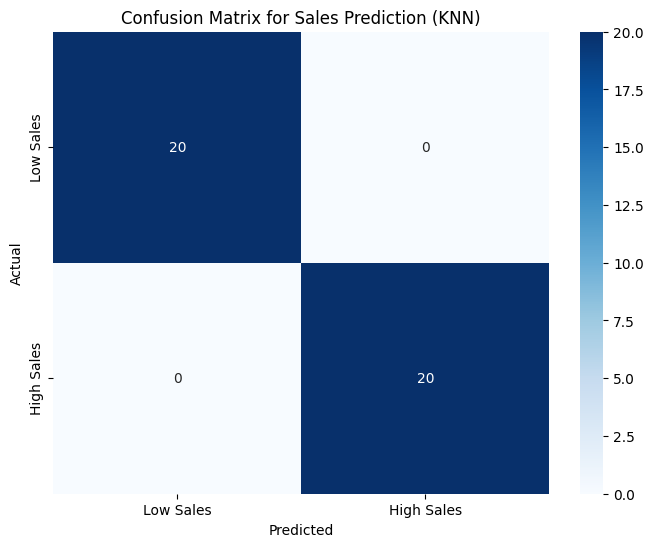

In [89]:
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)  # 1 for high sales, 0 for low sales
y_test_class = np.where(y_test >= threshold, 1, 0)

# Now, you can create the confusion matrix for KNN
cm_knn = confusion_matrix(y_test_class, y_pred_class)

# Visualize the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sales Prediction (KNN)')
plt.show()

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train, y_train = train_data[['TV', 'Radio','Newspaper']], train_data['Sales']
fitted_model_dt= DecisionTreeRegressor()
fitted_model_dt.fit(x_train,y_train)
y_pred = fitted_model_dt.predict

y_pred = fitted_model_dt.predict(x_test)
MSE =  mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)
print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.5252499999999998
Mean absolute error value is:  1.1825000000000003
R2 score value is:  0.9127105110336817


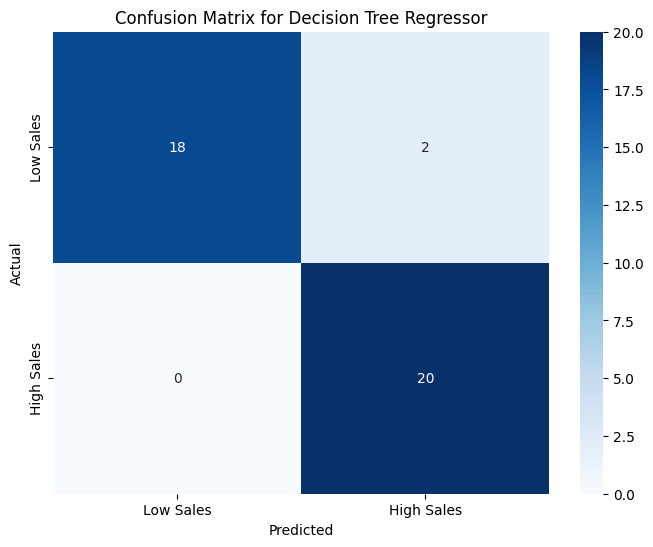

In [91]:
from sklearn.metrics import confusion_matrix
threshold = np.mean(y_test)
y_pred_class = np.where(y_pred >= threshold, 1, 0)
y_test_class = np.where(y_test >= threshold, 1, 0)
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Regressor')
plt.show()

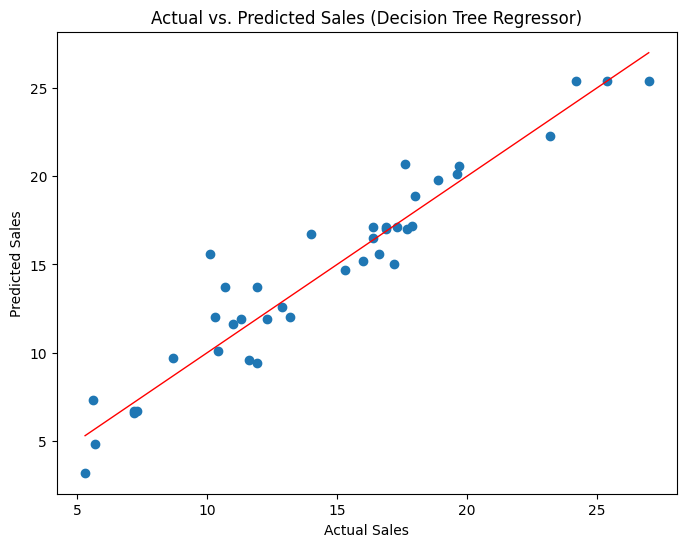

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Decision Tree Regressor)")
plt.show()

               Model      MSE     MAE  R-squared
0  Linear Regression  2.52525  1.1825   0.912711
1                KNN  3.17866  1.4070   0.890124
2      Decision Tree  2.52525  1.1825   0.912711
3      Random Forest  2.52525  1.1825   0.912711


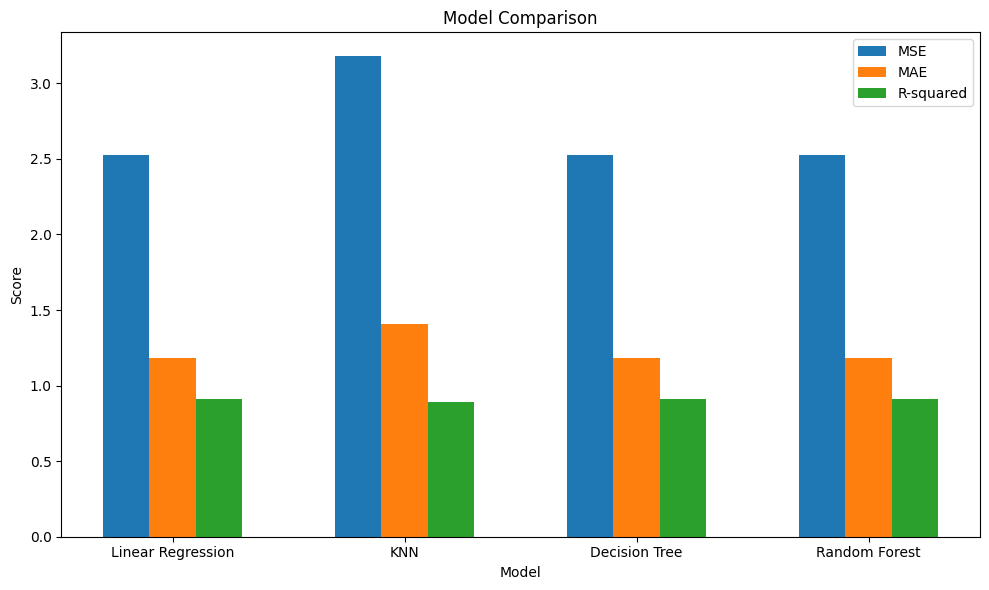

In [93]:
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest']

mse_scores = [MSE, mse, MSE, MSE]
mae_scores = [MAE, mae, MAE, MAE]
r2_scores = [R2_Score, r2, R2_Score, R2_Score]


results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})

# Display the comparison table
print(results_df)

# Plotting the comparison
plt.figure(figsize=(10, 6))
bar_width = 0.2

index = np.arange(len(model_names))

plt.bar(index, mse_scores, bar_width, label='MSE')
plt.bar(index + bar_width, mae_scores, bar_width, label='MAE')
plt.bar(index + 2 * bar_width, r2_scores, bar_width, label='R-squared')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
x.tail(10)

,TV,Radio,Newspaper
190,39.5,41.1,5.8
191,75.5,10.8,6.0
192,17.2,4.1,31.6
193,166.8,42.0,3.6
194,149.7,35.6,6.0
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [95]:
y.tail(10)

,Sales
190,10.8
191,11.9
192,5.9
193,19.6
194,17.3
195,7.6
196,14.0
197,14.8
198,25.5
199,18.4


In [96]:
data = {'TV': [100], 'Radio': [20] ,'Newspaper': [10]}
trial_data = pd.DataFrame(data)

In [98]:
predict_rating = knn_model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  12.86
